<a href="https://colab.research.google.com/github/vydiep/MLProject/blob/main/PT_LSTMs_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()

Saving RNN_util.py to RNN_util.py


{'RNN_util.py': b'import json\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nimport time\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nimport matplotlib.pyplot as plt\nfrom torch.utils.data import DataLoader, TensorDataset\n\ndef load_data(data_path):\n    """\n    Load data from JSON file \n\n    :param  data_path(string)\n        Path to JSON file \n\n    :return X (ndarray)      \n        Features from data\n    :return y (ndarray)      \n        Label for data\n\n    Resource: \n        https://github.com/musikalkemist/DeepLearningForAudioWithPython/blob/master/19-%20How%20to%20implement%20an%20RNN-LSTM%20for%20music%20genre%20classification/code/19-%20How%20to%20implement%20an%20RNN-LSTM%20for%20music%20genre%20classification.py\n    """\n\n    with open(data_path, "r") as fp:\n        data = json.load(fp)\n\n    X = np.array(data["mfcc"])\n    y = np.array(data["labels"])\n    \n    return X, y\n\n\ndef prepare_datasets(data_path, 

In [3]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from RNN_util import get_data_loaders, train, test, plot_history
import torch
import torch.nn as nn
from torch.nn.functional import relu
from torchsummary import summary
from torchinfo import summary

## LSTM Model with Dropout

In [5]:
"""
Gudiance from Resources: 
    https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_lstm_neuralnetwork/
    https://middlebury-csci-0451.github.io/CSCI-0451/lecture-notes/text-generation.html 
"""

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, layer_dim=2, output_dim=1):
        """
        Create LSTM Model with 1 hidden layer for binary classification 
        """
        super(LSTMModel, self).__init__()
        
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.training_info = {'train_losses': [], 
                              'train_accuracies': [],
                              'val_losses': [], 
                              'val_accuracies': []}

        # LSTM Layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)

        # Dropout layer
        self.dropout = nn.Dropout(0.2)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.dropout(out)

        # Index hidden state of last time step
        out = out[:,-1,:]
        out = self.fc(relu(out))

        return out

## Data Loading/Prep

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
DATA_PATH = "/content/drive/Shareddrives/MLProject/MusicNet/rnn-data.json"
train_loader, val_loader, test_loader = get_data_loaders(DATA_PATH)

## LSTM with 1 Layer and Dropout

In [7]:
model_1_path = "/content/drive/Shareddrives/MLProject/MusicNet/models/LSTM-1-Layer-Dropout.pth"
graph_1_path = "/content/drive/Shareddrives/MLProject/MusicNet/models/LSTM-1-Layer-Dropout-graph.png"

In [8]:
model_1 = LSTMModel(input_dim=13, layer_dim=1)
# Load previously saved model for more training
# checkpoint = torch.load(model_1_path)
# model_1.load_state_dict(checkpoint['model_state_dict'])
# model_1.training_info['train_losses'] = checkpoint['train_losses']
# model_1.training_info['train_accuracies'] = checkpoint['train_accuracies']
# model_1.training_info['val_losses'] = checkpoint['val_losses']
# model_1.training_info['val_accuracies'] = checkpoint['val_accuracies']
# model_1.eval()
# model_1.training_info

In [9]:
summary(model_1)

Layer (type:depth-idx)                   Param #
LSTMModel                                --
├─LSTM: 1-1                              20,224
├─Dropout: 1-2                           --
├─Linear: 1-3                            65
Total params: 20,289
Trainable params: 20,289
Non-trainable params: 0

In [29]:
train(model_1, train_loader, val_loader, 25, device)

Epoch 76:
	Train Loss=0.4307 Train Accuracy=78.44%
	Val Loss  =0.4758 Val Accuracy  =77.21%
Epoch 77:
	Train Loss=0.4182 Train Accuracy=79.70%
	Val Loss  =0.4754 Val Accuracy  =77.21%
Epoch 78:
	Train Loss=0.4179 Train Accuracy=80.21%
	Val Loss  =0.4873 Val Accuracy  =77.21%
Epoch 79:
	Train Loss=0.4214 Train Accuracy=79.14%
	Val Loss  =0.4973 Val Accuracy  =77.21%
Epoch 80:
	Train Loss=0.4124 Train Accuracy=80.33%
	Val Loss  =0.4774 Val Accuracy  =78.39%
Epoch 81:
	Train Loss=0.4082 Train Accuracy=80.43%
	Val Loss  =0.4784 Val Accuracy  =77.08%
Epoch 82:
	Train Loss=0.4151 Train Accuracy=80.49%
	Val Loss  =0.4736 Val Accuracy  =77.73%
Epoch 83:
	Train Loss=0.4267 Train Accuracy=80.30%
	Val Loss  =0.4760 Val Accuracy  =76.69%
Epoch 84:
	Train Loss=0.4116 Train Accuracy=80.46%
	Val Loss  =0.4601 Val Accuracy  =77.73%
Epoch 85:
	Train Loss=0.4073 Train Accuracy=80.52%
	Val Loss  =0.4529 Val Accuracy  =78.26%
Epoch 86:
	Train Loss=0.4043 Train Accuracy=81.00%
	Val Loss  =0.4731 Val Accura

In [30]:
test(model_1, test_loader, device) 

Test accuracy: 76 %


In [31]:
torch.save({
            'model_state_dict': model_1.state_dict(),
            'train_losses': model_1.training_info['train_losses'],
            'train_accuracies': model_1.training_info['train_accuracies'],
            'val_losses': model_1.training_info['val_losses'],
            'val_accuracies': model_1.training_info['val_accuracies']
            }, model_1_path)

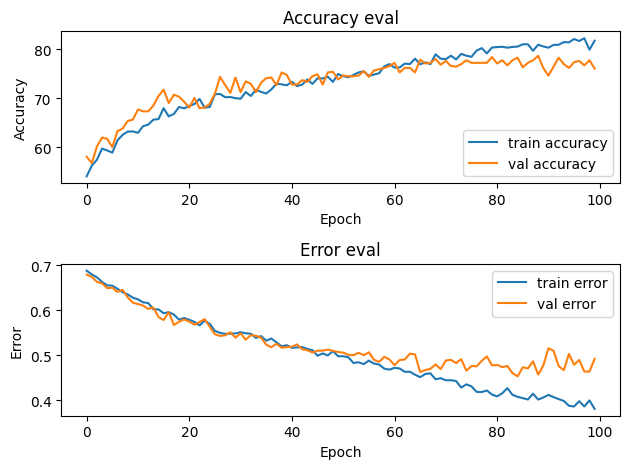

In [32]:
plot_history(model_1, graph_1_path)

## LSTM with 2 Layers and Dropout

In [14]:
model_2_path = "/content/drive/Shareddrives/MLProject/MusicNet/models/LSTM-2-Layers-Dropout.pth"
graph_2_path = "/content/drive/Shareddrives/MLProject/MusicNet/models/LSTM-2-Layers-Dropout-graph.png"

In [15]:
model_2 = LSTMModel(input_dim=13, layer_dim=2)
# Load previously saved model for more training
# checkpoint = torch.load(model_2_path)
# model_2.load_state_dict(checkpoint['model_state_dict'])
# model_2.training_info['train_losses'] = checkpoint['train_losses']
# model_2.training_info['train_accuracies'] = checkpoint['train_accuracies']
# model_2.training_info['val_losses'] = checkpoint['val_losses']
# model_2.training_info['val_accuracies'] = checkpoint['val_accuracies']
# model_2.eval()
# model_2.training_info

In [16]:
summary(model_2)

Layer (type:depth-idx)                   Param #
LSTMModel                                --
├─LSTM: 1-1                              53,504
├─Dropout: 1-2                           --
├─Linear: 1-3                            65
Total params: 53,569
Trainable params: 53,569
Non-trainable params: 0

In [33]:
train(model_2, train_loader, val_loader, 25, device)

Epoch 76:
	Train Loss=0.2774 Train Accuracy=87.37%
	Val Loss  =0.5693 Val Accuracy  =78.78%
Epoch 77:
	Train Loss=0.2538 Train Accuracy=88.45%
	Val Loss  =0.5741 Val Accuracy  =77.60%
Epoch 78:
	Train Loss=0.2442 Train Accuracy=89.02%
	Val Loss  =0.6485 Val Accuracy  =76.82%
Epoch 79:
	Train Loss=0.2471 Train Accuracy=89.14%
	Val Loss  =0.6179 Val Accuracy  =77.21%
Epoch 80:
	Train Loss=0.2999 Train Accuracy=86.71%
	Val Loss  =0.5612 Val Accuracy  =78.65%
Epoch 81:
	Train Loss=0.2594 Train Accuracy=89.05%
	Val Loss  =0.6207 Val Accuracy  =76.69%
Epoch 82:
	Train Loss=0.2199 Train Accuracy=90.37%
	Val Loss  =0.6692 Val Accuracy  =77.60%
Epoch 83:
	Train Loss=0.2297 Train Accuracy=89.46%
	Val Loss  =0.6151 Val Accuracy  =75.78%
Epoch 84:
	Train Loss=0.2189 Train Accuracy=90.28%
	Val Loss  =0.6518 Val Accuracy  =77.60%
Epoch 85:
	Train Loss=0.2179 Train Accuracy=89.80%
	Val Loss  =0.6195 Val Accuracy  =77.47%
Epoch 86:
	Train Loss=0.2562 Train Accuracy=88.32%
	Val Loss  =0.6293 Val Accura

In [34]:
test(model_2, test_loader, device) 

Test accuracy: 76 %


In [35]:
torch.save({
            'model_state_dict': model_2.state_dict(),
            'train_losses': model_2.training_info['train_losses'],
            'train_accuracies': model_2.training_info['train_accuracies'],
            'val_losses': model_2.training_info['val_losses'],
            'val_accuracies': model_2.training_info['val_accuracies']
            }, model_2_path)

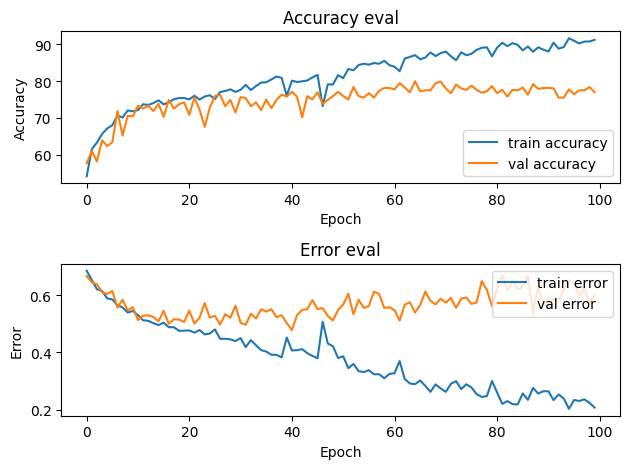

In [36]:
plot_history(model_2, graph_2_path)